# Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

**План занятия**

* [Теоретическая часть](#theory)
    * [Масштабирование признаков](#0)
    * [Стохастический градиентный спуск](#1)
    * [SGD своими руками](#sgd_manual)
    * [Переобучение](#overfit)
    * [Методы борьбы с переобучением](#methods)
        * [Регуляризация](#reg)
* [Практическая часть](#practice)
    * [Домашнее задание](#hw)

## <center>Теоретическая часть<a class="anchor" id="theory"></a><center>

## Масштабирование признаков <a class='anchor' id='0'>

В машинном обучении при работе с линейными моделями полезной является практика _масштабирования признаков_. Многие методы машинного обучения, в том числе и линейные, наиболее эффективны в том случае, когда признаки имеют одинаковый масштаб. По сути масштабирование означает приведение признаков к какой-то единой шкале. 

Существует большое количество методов масштабирования, наиболее популярными из которых являются _нормализация_ и _стандартизация_.

Метод **нормализации** заколючается в приведении признаков к масштабу в диапазоне [0-1].

Для его реализации необходимо найти минимальное $min_{j} (x^{j}_{i})$ и максимальное $max_{j} (x^{j}_{i})$ значение признака на обучающей выборке. При этом отмасштабированное значение признака будет находиться по формуле

$$x^{j}_{i} = \frac{x^{j}_{i} - min_{j} (x^{j}_{i})}{max_{j} (x^{j}_{i})-min_{j} (x^{j}_{i})}.$$

После преобразования значений признаков минимальное значение превратится в 0, а максимальное - в 1.

Пример различия в сходимости алгоритма на сырых и нормализованных данных:
<img src="images/L2_normalization.png" style="width: 500px;">

**Стандартизация** заключается в получении своего рода значения сдвига каждого признака от среднего. Для ее реализации необходимо вычислить среднее значение признака 

$$\mu_{j} = \frac{1}{l}\sum^{l}_{i=1}x^{j}_{i}$$

и стандартное отклонение, которое находится путем суммирования квадратов отклонения значений признака на объектах выборки от среднего $\mu_{j}$ и делением на число объектов выборки с последующим извлечением корня:

$$\sigma_{j} = \sqrt{\frac{1}{l}\sum^{l}_{i=1}(x^{j}_{i}-\mu_{j})^{2}}$$

Чтобы отмасштабировать признак, каждое его значение преобразуется по формуле

$$x^{j}_{i}=\frac{x^{j}_{i} - \mu_{j}}{\sigma_{j}}.$$

Масштабирование является важным этапом подготовки данных перед применением методов машинного обучения. 

Важным и последним свойством масштабирования является факт, что после масштабирования признаков в линейных моделях веса при них могут интерпретироваться как мера значимости этих признаков.

Существуют различные ситуации, когда целесообразно применять тот или иной метод масштабирования. Нормализовать полезно признаки, опирающиеся на величину значений - такие как расстояние (knn, k-means). Стандартизировать полезно признаки для модели, которая опирается на распределение (линейные модели). В общем случае, когда выбор метода неочевиден, полезной практикой считается создавать масштабированные копии набора данных, с которыми работает специалист, и сравнивать друг с другом полученные после применения модели результаты для выявления оптимального метода масштабирования для имеющейся ситуации.

## Стохастический градиентный спуск <a class='anchor' id='1'>

1. Инициализация w

2. Цикл по k = 1,2,3,...:

    * $w^{k} = w^{k-1} - \eta_{k}\nabla Q(w^{k-1}, X)$

    * Если $||w^{k} - w^{k-1}|| < \epsilon$, то завершить.


Вспомним метод градиентного спуска, рассмотренный ранее.

На каждой итерации приближение получается вычитанием из предыдущего вектора градиента, умноженного на некоторый шаг:


$$w^{k} = w^{k-1} - \eta_{k}\nabla Q(w^{k-1}, X).$$

При этом выражение градиента в матричной форме выглядит так:

$$\nabla_{w}Q(w,X) = \frac{2}{l}X^{T}(Xw-y).$$

Если расписать $j$-ю компонетну этого градиента, то получим

$$\frac{\partial Q}{\partial w_{j}} = \frac{2}{l}\sum^{l}_{i=1}x^{j}_{i}(\left \langle w,x_{i} \right \rangle - y_{i}),$$

то есть суммирование по всем $l$ объектам обучающей выборки. Здесь выражение под суммой показывает, как нужно изменить $j$-й вес, чтобы как можно сильнее улучшить качество __на объекте $x_{i}$__, а вся сумма показывает, как нужно изменить вес, чтобы улучшить качество на __всей выборке__.

В этой формуле отражен один из главных недостатков градиентного спуска: если выборка большая по объему, то даже один шаг градиентного спуска будет занимать много вычислительных ресурсов и времени.

Стремление к оптимизации процесса привело к появлению _стохастического градиентного спуска_ (Stochastic gradient descent, SGD). Идея его основана на том, что на одной итерации мы вычитаем не вектор градиента, вычисленный по всей выборке, а вместо этого случайно выбираем один объект из обучающей выборки $x_{i}$ и вычисляем градиент только на этом объекте, то есть градиент только одного слагаемого в функционале ошибки и вычитаем именно этот градиент из текущего приближения вектора весов:

$$w^{k} = w^{k-1} - \eta_{k}\nabla Q(w^{k-1}, \{x_{i}\}),$$

то есть $\nabla Q(w^{k-1}, X)$ заменяется на $\nabla Q(w^{k-1}, \{x_{i}\})$.

Если в случае градиентного спуска мы стараемся на каждой итерации уменьшить ошибку на всей выборке, и по мере увеличения числа итераций ошибка падает монотонно, то в случае стохастического градиентного спуска мы уменьшаем на каждой итерации ошибку только на одном объекте, но при этом есть вероятность увеличить ее на другом объекте, поэтому график изменения ошибки может получаться немонотонным, и даже иметь пики (см. пример по ссылке [1] из списка литературы). То есть на какой-то итерации мы можем даже увеличить ошибку, но при этом в целом по ходу метода ошибка снижается, и рано или поздно мы выходим на нормальный уровень.

1. Инициализация w

2. Цикл по k = 1,2,3,...:

    * Выбираем случайные объект $x_{i}$ из X
    * $w^{k} = w^{k-1} - \eta_{k}\nabla Q(w^{k-1}, \{x_{i}\})$
    * Если $||w^{k} - w^{k-1}|| < \epsilon$, то завершить.


<img src="images/compare_gd_sgd.png" width=550px>

## SGD своими руками<a class="anchor" id="sgd_manual"></a>

Реализуем стохастический градиентный спуск своими руками.

In [55]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [56]:
# сгенерируем набор данных
X, Y, coef = datasets.make_regression(n_samples=1000, n_features=2, n_informative=2, n_targets=1, 
                                      noise=5, coef=True, random_state=2)
X[:, 0] *= 10
display(X, Y, coef)

array([[  3.78794466,  -0.61837549],
       [ -6.52931145,  -1.06706712],
       [-10.6581629 ,  -0.34682333],
       ...,
       [ 11.94510163,   1.00147133],
       [  1.25623099,   0.35261274],
       [ -0.5674652 ,   0.41214611]])

array([-2.61123036e+01, -1.22254125e+02, -9.33701155e+01,  2.23698676e+01,
       -1.19353069e+00,  7.55093913e+01,  4.17391914e+00,  3.37850492e+01,
       -4.13327830e+01, -1.71060319e+00,  6.91533479e+01, -3.84944494e+01,
       -1.40841311e+01, -7.87094871e+00,  2.24655412e+01,  3.52449558e+01,
        3.54202311e+01,  4.54019343e+01,  3.93612257e+01,  1.13645719e-01,
       -1.23294801e+01,  1.18940297e+02,  2.90747757e+02,  1.07353713e+01,
        1.33621709e+02, -8.58105655e+01, -1.19323461e+01,  5.66776267e+01,
        1.45867826e+02, -2.72626165e+02, -3.86689973e+00,  4.64700598e+01,
        1.34844522e+02,  1.01167107e+01,  1.02407708e+01,  1.50555004e+01,
        6.05940840e+01, -1.46615087e-01, -1.04571676e+02, -1.09697817e+02,
        1.21274981e+01,  9.99648515e+01,  8.47610760e+01, -1.05265489e+02,
        1.35034101e+02, -3.24978496e+02,  6.56243085e+01, -4.80030943e+01,
        8.43343786e+01,  3.38914896e+00,  2.65015621e+01,  6.26227854e+01,
       -1.45046490e+02,  

array([62.6735955, 68.0472182])

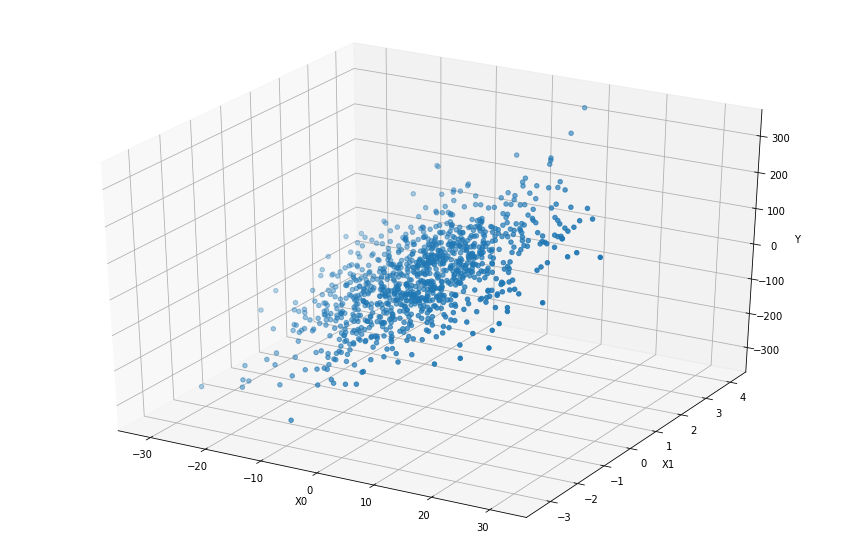

In [57]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], Y)

ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('Y')
plt.show()

Отмасштабируем получившиеся признаки методом стандартизации.

In [58]:
# Получим средние значения и стандартное отклонение по столбцам

means = np.mean(X, axis=0)
stds = np.std(X, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву
display(means, stds)

array([-0.79012702,  0.02045785])

array([9.85635367, 0.99101454])

In [59]:
# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        X[i][j] = (X[i][j] - means[j]) / stds[j]

In [60]:
X

array([[ 0.46447924, -0.64462559],
       [-0.58228272, -1.09738549],
       [-1.00118525, -0.3706113 ],
       ...,
       [ 1.29208317,  0.98990825],
       [ 0.20761816,  0.33516651],
       [ 0.02259069,  0.39523966]])

In [66]:
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)

display(means, stds)

array([-2.40328590e-17,  9.54791801e-18])

array([1., 1.])

In [67]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

Подготовка данных и средств проверки закончена. Далее реализуем сам стохастический градиентный спуск.

In [72]:
%%time
# инициализируем начальный вектор весов
w = np.zeros(X.shape[1])

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e5

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

np.random.seed(1234)

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(X.shape[0], size=1)
    
    y_pred = np.dot(X[train_ind], w)
    
    #ИЗМЕНЕНИЕ
    # в следующей формуле вместо Y[train_ind].shape[0] должно быть Y.shape[0]
    new_w = w - eta * 2 / Y.shape[0] * np.dot(X[train_ind].T, y_pred - Y[train_ind])
    #
    
    weight_dist = np.linalg.norm(new_w - w, ord=2)

    error = mserror(X, new_w, Y)
    
    w_list.append(new_w.copy())
    errors.append(error)
    
    if iter_num % 1000 == 0:
        print(f'Iteration #{iter_num}: W_new = {new_w}, MSE = {round(error, 2)}')

    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'Iter {iter_num}: error - {error}, weights: {new_w}')
print(f'В случае использования стохастического градиентного спуска ошибка составляет {round(errors[-1], 4)}')

Iteration #0: W_new = [-0.00087705  0.00116866], MSE = 8190.67
Iteration #1000: W_new = [1.23448526 1.34145334], MSE = 7868.75
Iteration #2000: W_new = [2.48181208 2.67997377], MSE = 7552.18
Iteration #3000: W_new = [3.6364344  3.96042664], MSE = 7259.79
Iteration #4000: W_new = [4.78131928 5.20351319], MSE = 6978.84
Iteration #5000: W_new = [5.91635587 6.39140102], MSE = 6711.15
Iteration #6000: W_new = [6.99218888 7.49400424], MSE = 6465.02
Iteration #7000: W_new = [8.19692721 8.74112411], MSE = 6193.48
Iteration #8000: W_new = [9.21034798 9.94441368], MSE = 5952.16
Iteration #9000: W_new = [10.16370382 10.98773619], MSE = 5739.38
Iteration #10000: W_new = [11.10313359 12.10481093], MSE = 5523.84
Iteration #11000: W_new = [11.97923852 13.1526246 ], MSE = 5325.93
Iteration #12000: W_new = [12.90608662 14.17852011], MSE = 5129.16
Iteration #13000: W_new = [13.79861221 15.26127585], MSE = 4933.48
Iteration #14000: W_new = [14.7231593  16.32183371], MSE = 4740.95
Iteration #15000: W_new 

Для стохастического градиентного спуска мы увеличили максимальное число итераций (max_iter) до 1000, что естественно, так как из-за специфики метода для достижения сходимости нужно большее количество шагов.

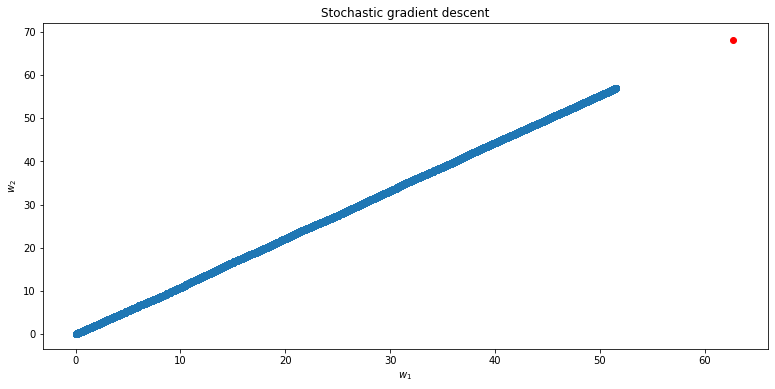

In [73]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Stochastic gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(coef[0], coef[1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

Text(0, 0.5, 'MSE')

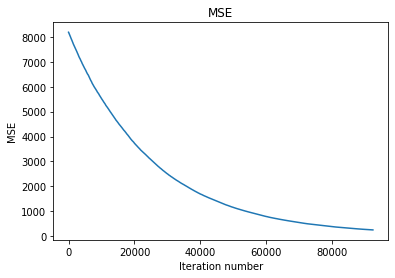

In [74]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Как и в случае градиентного спуска, вектор весов приближается к истинному. При этом падает и ошибка.

Добиться лучшей скорости сходимости в методе стохастического градиентного спуска можно варьируя величину шага или используя методы, подбирающие ее адаптивно.

Среди преимуществ SGD можно выделить гораздо более быстрое вычисление одного шага по сравнению с обычным градиентным спуском и отсутствие необходимости хранить всю выборку в памяти при работе метода, что в свою очередь позволяет работать с очень большими выборками, которые невозможно поместить в память.

## Переобучение <a class='anchor' id='overfit'>

Чтобы понять смысл переобучения и недообучения, начнем с примера. Допустим, у нас есть исходная известная зависимость 3-го порядка:

$$f(x) = 0.6 - 13.2x - 5.3 x^{2} - 4.17x^{3}.$$

Реализуем ее в виде python-функции и построим график.

In [75]:
def f(x):
    return 0.6 - 13.2 * x - 5.3 * x ** 2 - 4.17 * x ** 3

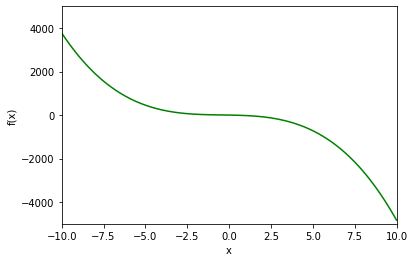

In [77]:
dots = np.linspace(-10, 10, 100)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g');

Теперь сгенерируем датасет из десяти случайных точек, подчиняющихся этой зависимости, с добавлением шума и нанесем на график.

In [78]:
np.random.seed(16)
x_data = np.random.uniform(-10, 10, 10)
f_data = [f(i) for i in x_data] + np.random.uniform(-1000, 1000, 10)

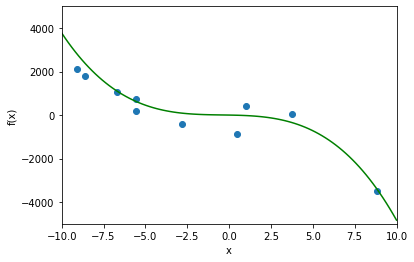

In [79]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data);

Теперь попробуем создать модель, способную восстановить исходную зависимость. Самым примитивным так называемый __константный алгоритм__, то есть модель вида 

$$a(x) = w_{0}.$$

Зависимость такой модели от признаков будет иметь вид горизонтальной прямой, что, очевидно, не обобщает нашу зависимость в должном виде (см. график ниже).

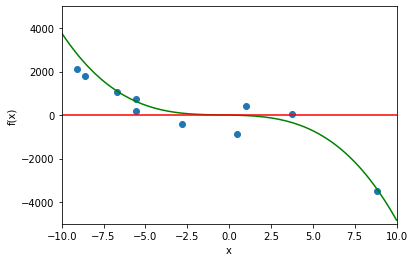

In [80]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)
plt.plot(dots, [dots.mean()]*len(dots), color='r');

Далее усложним семейство алгоритмов, применив линейную регрессию, которая в случае одного признака будет иметь вид 

$$a(x) = w_{0} + w_{1}x.$$

Обучим соответствующую модель, применив для этого методы python "из коробки" для работы с линейной регрессией.

In [84]:
from sklearn.linear_model import LinearRegression

# создадим модель
linear_regressor = LinearRegression()

# обучим ее
linear_regressor.fit(np.reshape(x_data, (-1, 1)), f_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
# выведем полученный вес при признаке и свободный коэффициент
print(linear_regressor.coef_[0], linear_regressor.intercept_)

-237.82400777158767 -411.9249993231066


Нанесем полученную после обучения модель на график

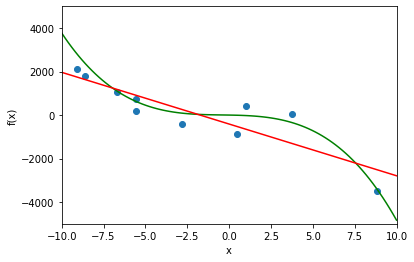

In [87]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)
plt.plot(dots, linear_regressor.predict(np.reshape(dots, (-1, 1))), color='r');

Мы обучили линейную модель, и видимо, что она, как и константная, плохо восстанавливает исходную зависимость. В данном случае можно говорить о __недообучении__. Хороший алгоритм не был построен, поскольку с помощью выбранного семейства алгоритмов невозможно восстановить исходную закономерность.

Усложним используемое семейство алгоритмов до кубической зависимости 

$$a(x) = w_{0} + w_{1}x + w_{2}x^{2} + w_{3}x^{3}.$$

Сделаем это путем искусственной генерации новой матрицы признаков, состоящей из исходных $x$, возведенных в степени до 3, используя `sklearn.preprocessing.PolynomialFeatures`. 

Из [статьи](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) про PolynomialFeatures:

For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

In [92]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import pandas as pd

In [93]:
a = pd.DataFrame([[2, 3, 4]], columns=['a', 'b', 'c'])

In [94]:
a

,a,b,c
0,2,3,4


In [95]:
PolynomialFeatures(degree=2).fit_transform(a)

array([[ 1.,  2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

In [96]:
# x_data
# x_data[0]**0, x_data[0]**1, x_data[0]**2, x_data[0]**3

In [97]:
# PolynomialFeatures(degree=3).fit_transform(x_data.reshape(-1, 1))

In [98]:
# создадим новую кубическую модель
third_degree_regressor = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

# обучим ее
third_degree_regressor.fit(np.reshape(x_data, (-1, 1)), f_data)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [99]:
# выведем полученные веса при признаках и свободный коэффициент
print(third_degree_regressor.named_steps.linearregression.coef_)
print(third_degree_regressor.named_steps.linearregression.intercept_)

[ 0.         21.09882775 -7.90436131 -4.26313079]
-55.952650937062


Нанесем полученную в итоге зависимость на график.

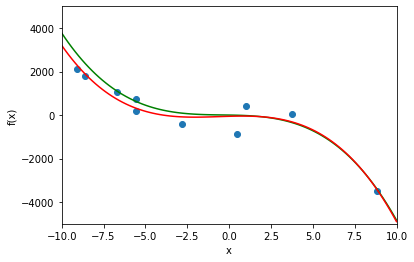

In [100]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)
plt.plot(dots, third_degree_regressor.predict(np.reshape(dots, (-1, 1))), color='r');

Полученный алгоритм достаточно хорошо описывает данные, но не идеально. И в реальных условиях может возникнуть вопрос, можно ли добиться лучшего совпадения увеличением сложности алгоритма.

Проиллюстрируем, что происходит в случае использования многочлена 8-й степени.

In [101]:
# создадим модель 8-й степени
eighth_degree_regressor = make_pipeline(PolynomialFeatures(degree=8), LinearRegression())

# обучим ее
eighth_degree_regressor.fit(np.reshape(x_data, (-1, 1)), f_data)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=8, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

Покажем получившийся график зависимости.

In [102]:
# выведем полученные веса при признаках и свободный коэффициент
print(eighth_degree_regressor.named_steps.linearregression.coef_)
print(eighth_degree_regressor.named_steps.linearregression.intercept_)

[ 0.00000000e+00  1.07116179e+03  8.76325217e+02  4.03130194e+01
 -5.61701733e+01 -9.81320836e+00  9.56286213e-02  1.16554743e-01
  6.21060019e-03]
-1536.7939104956604


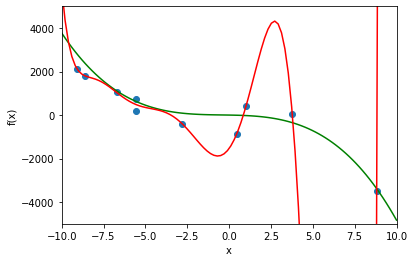

In [103]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10, 10)

plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)
plt.plot(dots, eighth_degree_regressor.predict(np.reshape(dots, (-1, 1))), color='r');

## Методы борьбы с переобучением <a class='anchor' id='methods'>

Видно, что новая модель лучше описывает имеющиеся в обучающей выборке данные и дает фактически идеальные ответы на них, но про этом в целом зависимость сильно отличается от истинной. Поэтому если мы попробуем применить эту модель на новых данных, ответы будут расходиться с правильными. Такое явление и называется __переобучением__. Алгоритм слишком сильно подогнан под обучающую выборку, и за счет этого будет давать неадекватные ответы на новых точках.

Таким образом, недообучение несет за собой плохое качество на обучении и на новых данных, а переобучение - хорошее качество на обучении и плохое на новых данных.

Понятно, как бороться с недообучением - усложнять семейство алгоритмов. Возникает вопрос, как выявить переобучение и его избежать. В случае переобучения, как было сказано ранее, данные из обучающей выборки алгоритмом будут описываться хорошо, а новые данные - плохо, поэтому используя только обучающую выборку, невозможно заключить, хорошо обучен алгоритм или переобучен, так как оба они будут хорошо описывать известные данные.

Есть несколько методов оценки качества алгоритма и выявления переобучения:

1. Не использовать всю выборку для обучения, а откладывать часть данных для проверки полученного алгоритма. Это называется **отложенной выборкой**. Данные делятся на обучающую и тестовую выборку в соотношении, например, 0.7 к 0.3, и затем на первой части алгоритм обучается, а на второй проверяется. Размер отложенной выборки в данном случае нужно подбирать с осторожностью, так как слишком маленькая тестовая выборка не будет обеспечивать должной точности оценки качества обучения, а слишком маленькия обучающая выборка приведет к снижению качества обучения, так как будет малорепрезентативна. Таким образом, главный минус этого метода - сильная зависимость результата от того, как мы выбираем отложенную выборку. Например, в пространстве объектов могут быть какие-то особые, отличающиеся от остальных по какому-то свойству объекты, и может так произойти, что после разбиения они не попадут в обучающую выборку, алгоритм на них не обучится, и качество обучения после проверки на этих объектах, попавших в тестовую выборку, будет плохим. Один из путей решения этой проблемы - многократное случайное разбиение выборки на тестовую и обучающую и использование в качестве оценки качества среднего значения ошибки полученной после каждого разбиения. Но и этот метод не гарантирует, что каждый объект побывает в обучающей выборке, так как разбиения случайные.
<img src="images/valid.png" style="width: 500px;">


2. **Кросс-валидация** (усложненная версия метода отложенной выборки). Этот метод как раз вытекает из проблемы, описанной выше. Он является более системным подходом. В этом случае выборка разбивается на $k$ блоков, и затем каждый из них по очереди используется в качестве тестового, а остальная часть - в качестве обучающей выборки. После прохождения всей выборки таким образом получается $k$ показателей качества, и итоговая оценка качества обучения по кросс-валидации оценивается как средняя из этих $k$. В этом случае мы гарантируем, что все данные поучаствуют в обучении. Выбор количества блоков $k$ обычно зависит от размера выборки. Чем больше данных, тем меньше нужно блоков, так как во-первых в этом случае после разбиения даже на малое количество блоков у нас остается большой объем данных в обучающей выборке, что обеспечивает хорошее качество обучения, а во-вторых, разбиение на $k$ блоков означает обучение алгоритма $k$ раз, соответственно, чем их больше, тем больше получается вычислительная сложность процесса обучения модели. Обычно $k$ принимает значение от 3 до 10.
<img src="images/kfolds.png" style="width: 500px;">


3. Использовать **меры сложности модели**, позволяющие без дополнительной выборки выявить переобучение.

Одним из знаков, что произошло переобучение модели, или _мерой сложности_ является получение больших по модулю весов при признаках. Посмотрим, что получилось в нашей последней модели.

In [104]:
# выведем полученные веса при признаках и свободный коэффициент
print(eighth_degree_regressor.named_steps.linearregression.coef_)
print(eighth_degree_regressor.named_steps.linearregression.intercept_)

[ 0.00000000e+00  1.07116179e+03  8.76325217e+02  4.03130194e+01
 -5.61701733e+01 -9.81320836e+00  9.56286213e-02  1.16554743e-01
  6.21060019e-03]
-1536.7939104956604


Видим веса 2 и 3 порядков в то время как в кубичесой модели и в исходной зависимости ничего подобного не было. Это и говорит нам о том, что в данном случае имеет место переобучение.

На этой особенности и основывается метод _регуляризации_ для борьбы с переобучением.

### Регуляризация <a class='anchor' id='reg'>

#### $L_2$-регуляризация (ridge, регуляризация Тихонова)

Метод регуляризации заключается в "штрафовании" модели за слишком большие веса путем добавления нового члена к ошибке:

$$Q(w, X) + \lambda ||w||^{2} \rightarrow \underset{w}{\text{min}}.$$

добавленный член $\lambda ||w||^{2}$ - **квадратичный регуляризатор**, который представляет собой $L_{2}$-норму вектора весов, то есть сумму квадратов весов $\sum^{d}_{j=1}w_{j}^{2}$, коэффициент $\lambda$ при нем - коэффициент регуляризации. Чем больше его значение, тем меньшая сложность модели будет получаться в процессе такого обучения. Если _увеличивать_ его, в какой-то момент оптимальным для модели окажется зануление всех весов. В то же время при слишком _низких_ его значениях появляется вероятность чрезмерного усложнения модели и переобучения. Выбор оптимального значения этого коэфициента является отдельной задачей и заключается в многократном обучении модели с разными его значениями и сравнении их качества.

По сути, смысл регуляризации заключается, как и в обычном обучении, в минимизации функционала ошибки, только в данном случае добавляется условие непревышения нормой вектора весов некоторого значения $||w||^{2}\leq C$, то есть ограничение весов, что и будет залогом избежания переобучения.

$$\begin{cases} Q(w, X) \rightarrow min \\ ||w||^2 \leq C \end{cases}$$

In [193]:
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])

y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

На графике ниже изображено изменение весов признаков при увеличении коэффициента регуляризации `alpha` от $10^{-3}$ до $100$ для модели `Ridge` (L2-регуляризация). Чем больше значение `alpha`, тем сильнее регуляризация и тем сильнее модель "штрафует" за большие значения весов, они убывают плавно и примерно одновременно друг с другом.


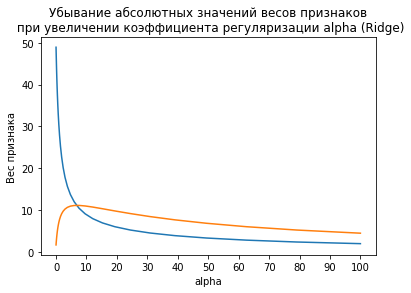

In [194]:
from sklearn.linear_model import Ridge

n = 50

train_amount = 5
train_X = X[:train_amount]
train_y = y[:train_amount]
test_X = X[train_amount:]
test_y = y[train_amount:]


coeffs = np.zeros((n, train_X.shape[1]))
alpha_list = np.logspace(-3, 2, n)

for i, val in enumerate(alpha_list):
    ridge = Ridge(alpha=val, fit_intercept=False)
    ridge.fit(train_X, train_y)
    
    coeffs[i, :] = ridge.coef_.flatten()

for i in range(train_X.shape[1]):
    plt.plot(alpha_list, coeffs[:, i])
    
plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Ridge)')
plt.xticks(np.arange(0, 101, 10))
plt.xlabel('alpha')
plt.ylabel('Вес признака');

Коэффициент регуляризации: 0.35564803062231287
Веса: [39.29323873  4.54660362]
MSE на обучении: 45.561742881081464
MSE на тесте: 76.44455769106496


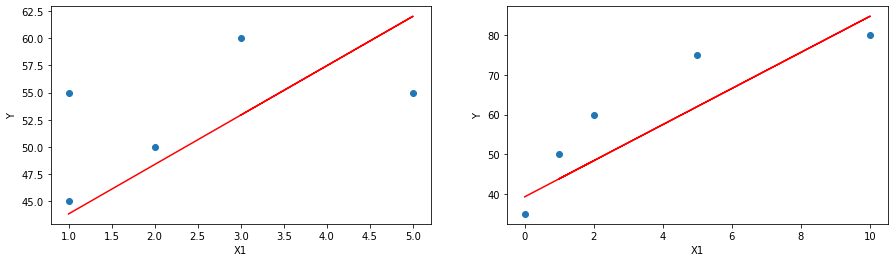

In [143]:
index = 25

coef = coeffs[index]

print(f'Коэффициент регуляризации: {alpha_list[index]}')
print(f'Веса: {coef}')

fig, axs = plt.subplots(1, 2, figsize=(15, 4))
ax1, ax2 = axs

ax1.scatter(train_X[:, 1], train_y)

y_pred = np.dot(train_X, coef)
ax1.plot(train_X[:, 1], y_pred, c='r')

ax1.set_xlabel('X1')
ax1.set_ylabel('Y')
print(f'MSE на обучении: {np.mean((y_pred - train_y)**2)}')

ax2.scatter(test_X[:, 1], test_y)

y_pred = np.dot(test_X, coef)
ax2.plot(test_X[:, 1], y_pred, c='r')

ax2.set_xlabel('X1')
ax2.set_ylabel('Y')
print(f'MSE на тесте: {np.mean((y_pred - test_y)**2)}')
plt.show()

#### $L_1$-регуляризация (lasso, регуляризация через манхэттенское расстояние)

Описанный выше метод с использованием $L_{2}$-нормы вектора весов в качестве регуляризатора называется **$L_{2}$-регуляризацией**. По аналогии существует также **$L_{1}$-регуляризация**, использующая в качестве регуляризатора $L_{1}$-норму вектора весов, то есть сумму модулей весов.

$$||w||_{1} = \sum^{d}_{j=1}|w_{j}|.$$

На графике ниже изображено изменение весов признаков при увеличении коэффициента регуляризации `alpha` от $10^{-3}$ до $100$ для модели `Lasso` (L1-регуляризация). Чем больше значение `alpha`, тем сильнее регуляризация и тем сильнее модель "штрафует" за большую абсолютную величину признаков. 

Такой метод часто используется для отбора признаков: у менее ценных признаков гораздо раньше обнуляются веса.

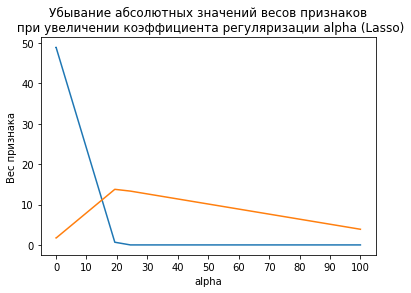

In [146]:
from sklearn.linear_model import Lasso

n = 50

coeffs = np.zeros((n, train_X.shape[1]))
alpha_list = np.logspace(-3, 2, n)

for i, val in enumerate(alpha_list):
    lasso = Lasso(alpha=val, fit_intercept=False)
    lasso.fit(train_X, train_y)
    coeffs[i, :] = lasso.coef_.flatten()

for i in range(train_X.shape[1]):
    plt.plot(alpha_list, coeffs[:, i])

    
plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Lasso)')
plt.xticks(np.arange(0, 101, 10))
plt.xlabel('alpha')
plt.ylabel('Вес признака');

Коэффициент регуляризации: 3.7275937203149416
Веса: [39.61933896  4.0232491 ]
MSE на обучении: 45.55574735307548
MSE на тесте: 89.38217775478338


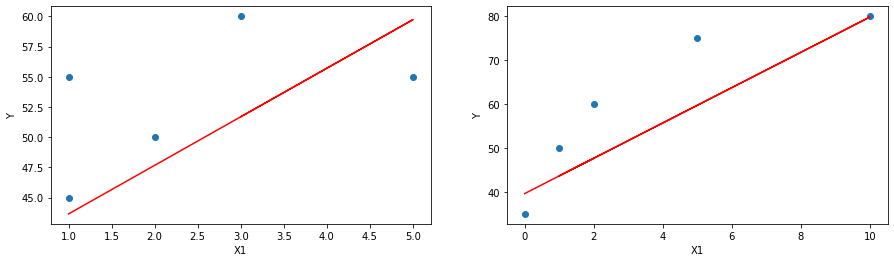

In [147]:
index = 35

coef = coeffs[index]

print(f'Коэффициент регуляризации: {alpha_list[index]}')
print(f'Веса: {coef}')

fig, axs = plt.subplots(1, 2, figsize=(15, 4))
ax1, ax2 = axs

ax1.scatter(train_X[:, 1], train_y)

y_pred = np.dot(train_X, coef)
ax1.plot(train_X[:, 1], y_pred, c='r')

ax1.set_xlabel('X1')
ax1.set_ylabel('Y')
print(f'MSE на обучении: {np.mean((y_pred - train_y)**2)}')

ax2.scatter(test_X[:, 1], test_y)

y_pred = np.dot(test_X, coef)
ax2.plot(test_X[:, 1], y_pred, c='r')

ax2.set_xlabel('X1')
ax2.set_ylabel('Y')
print(f'MSE на тесте: {np.mean((y_pred - test_y)**2)}')
plt.show()

#### Сравнение

$L_{2}$-регуляризатор:
* непрерывная гладкая функция
* штрафует модель за сложность

$L_{1}$-регуляризатор:
* негладкая функция
* занулении некоторых весов (отбор признаков)

Регуляризация создает некое абстрактное поле (зеленое) в градиентном спуске (овалы), из которого не может выйти обучение модели. Если мы увеличиваем Лямбду, то поле сужается.

<img src='images/compare_l1_l2_2.png'>

Можно применить одновременно L1 и L2 регуляризацию - это называется Elastic Net. Про это можно посмотреть [здесь](https://youtu.be/1dKRdX9bfIo) и почитать в оригинальной [статье](https://web.stanford.edu/~hastie/Papers/B67.2%20(2005)%20301-320%20Zou%20&%20Hastie.pdf).

### Коэффициент детерминации

_Коэффициент детерминации_ $R^{2}$ является еще одной метрикой качества в задачах регрессии. Ранее мы говорили о средней абсолютной и среднеквадратичной ошибке. Коэффициент детерминации позволяет развить тему среднеквадратичной ошибки, интерпретируя ее. 

MSE не позволяет сама по себе сделать вывод о том, как хорошо модель решает задачу. Например, если целевая переманная принимает значения от 0 до 1, а MSE равняется 10, это плохой показатель, а когда целевая переменная варьируется от 1000 до 10000, такое же значение уже является очень хорошим. Для избавления от такой неясности и был введен коэффициент детерминации, который по сути является нормированной среднеквадратичной ошибкой и принимает значения от 0 до 1.

$$R^2 = 1 - \frac{\frac{1}{n}\sum^{l}_{i=1}{(y - y_{pred})^2}}{\frac{1}{n}\sum^{l}_{i=1}{(y - \bar{y})^2}}$$

где $\bar{y}=\frac{1}{l}\sum^{l}_{i=1}y_{i}$ - среднее значение целевой переменной.

Коэффициент детерминации характеризует, какую долю дисперсии ответов объясняет модель. Если $R^{2}=1$, то модель идеально описывает данные, если же $R^{2}$ близко к нулю, то предсказания сопоставимы по качеству с константной моделью.

In [148]:
true = np.array([0, 0.2, 0.1, 0.6, 0.3, 0.9, 0.7])
pred = np.array([0.1, 0.3, 0.2, 0.7, 0.5, 0.5, 0.5])

np.mean((true - pred)**2)

0.04

In [149]:
true = np.array([100, 20, 10, 60, 30, 90, 70])
pred = np.array([110, 30, 20, 70, 50, 50, 50])

np.mean((true - pred)**2)

400.0

## <center>Практическая часть<a class="anchor" id="practice"></a><center>

In [150]:
import numpy as np
import matplotlib.pyplot as plt

__Задача:__ предсказание баллов ЕГЭ ученика

In [152]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [153]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Нормализация [0, 1]

In [154]:
X[:, 1].min(), X[:, 1].max()

(0, 10)

In [155]:
X[:, 2].min(), X[:, 2].max()

(450, 2000)

In [156]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

In [157]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [158]:
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm

array([[1.        , 0.1       , 0.03225806, 1.        ],
       [1.        , 0.1       , 0.16129032, 1.        ],
       [1.        , 0.2       , 0.19354839, 2.        ],
       [1.        , 0.5       , 0.09677419, 1.        ],
       [1.        , 0.3       , 0.64516129, 2.        ],
       [1.        , 0.        , 0.22580645, 1.        ],
       [1.        , 0.5       , 0.67741935, 3.        ],
       [1.        , 1.        , 1.        , 3.        ],
       [1.        , 0.1       , 0.        , 1.        ],
       [1.        , 0.2       , 0.35483871, 2.        ]])

Стандартизация

3.0


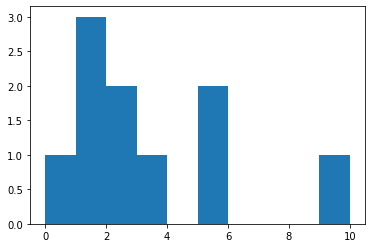

In [159]:
print(np.mean(X[:, 1]))
plt.hist(X[:, 1])
plt.show()

975.0


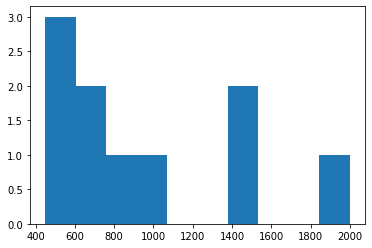

In [163]:
print(np.mean(X[:, 2]))
plt.hist(X[:, 2])
plt.show()

In [165]:
def standart_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [166]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standart_scale(X_st[:, 1])
X_st[:, 2] = standart_scale(X_st[:, 2])
X_st

array([[ 1.        , -0.70710678, -0.97958969,  1.        ],
       [ 1.        , -0.70710678, -0.56713087,  1.        ],
       [ 1.        , -0.35355339, -0.46401617,  2.        ],
       [ 1.        ,  0.70710678, -0.77336028,  1.        ],
       [ 1.        ,  0.        ,  0.97958969,  2.        ],
       [ 1.        , -1.06066017, -0.36090146,  1.        ],
       [ 1.        ,  0.70710678,  1.08270439,  3.        ],
       [ 1.        ,  2.47487373,  2.11385144,  3.        ],
       [ 1.        , -0.70710678, -1.08270439,  1.        ],
       [ 1.        , -0.35355339,  0.05155735,  2.        ]])

4.4408920985006264e-17


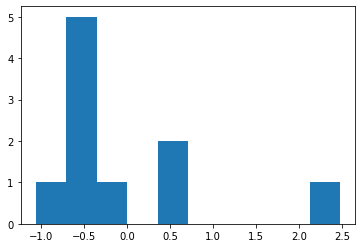

In [167]:
print(np.mean(X_st[:, 1]))
plt.hist(X_st[:, 1])
plt.show()

-4.163336342344337e-17


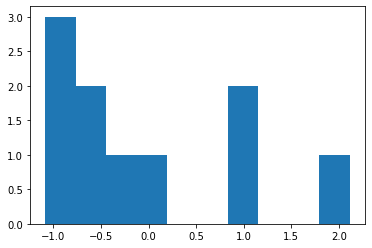

In [168]:
print(np.mean(X_st[:, 2]))
plt.hist(X_st[:, 2])
plt.show()

SGD (Stochastic gradient descent)

In [171]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [172]:
W = np.random.randn(X.shape[1])
W

array([ 0.04452171, -0.18359115,  0.7581856 , -0.84341361])

In [173]:
# классический  GD
def gradient_descent(X, y, iterations, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [175]:
gradient_descent(X_st, y, iterations=5000, eta=1e-2)

Iter: 0, weights: [1.96152861 1.3122039  2.70452068 2.97809811], error 2981.5767375051814
Iter: 500, weights: [23.69673616  5.15563345 -6.79760828 18.9576671 ], error 39.23323063323376
Iter: 1000, weights: [28.40973179  6.0954842  -5.81178616 16.29264414], error 32.83009026876078
Iter: 1500, weights: [31.80344     6.21541092 -4.53852048 14.35546375], error 29.42259532848708
Iter: 2000, weights: [34.34914934  6.2441197  -3.52143719 12.90033591], error 27.48164883748933
Iter: 2500, weights: [36.26997091  6.25931377 -2.74747044 11.80218303], error 26.374559942079024
Iter: 3000, weights: [37.72047864  6.27010862 -2.16232278 10.97289113], error 25.74307525617187
Iter: 3500, weights: [38.8159534   6.27819005 -1.72032651 10.34657821], error 25.382875536011664
Iter: 4000, weights: [39.64330773  6.28428607 -1.38650246  9.87355685], error 25.177417125752577
Iter: 4500, weights: [40.26816621  6.28888929 -1.13438142  9.51630793], error 25.060223369090696
Final MSE: 24.993375890891812


array([40.73927227,  6.29235977, -0.9442971 ,  9.24696354])

In [181]:
# стохастический градиентный спуск
def stohastic_gradient_descent(X, y, iterations, batch_size, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    n_batch = n // batch_size    
    if n % batch_size != 0:
        n_batch += 1
    print(f'amount of batches is {n_batch}')
        
    for i in range(0, iterations):
        
        for b in range(n_batch):
            start = batch_size * b
            end = batch_size * (b + 1)
            
#             print(b, start, end)
            
            X_tmp = X[start : end, ]
            y_tmp = y[start : end]

            y_pred_tmp = np.dot(X_tmp, W)
            err = calc_mse(y_tmp, y_pred_tmp)

            dQ = 2/len(y_tmp) * X_tmp.T @ (y_pred_tmp - y_tmp) # градиент функции ошибки
            W -= (eta * dQ)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [182]:
stohastic_gradient_descent(X_st, y, iterations=50000, batch_size=4, eta=1e-2)

amount of batches is 3
Iter: 0, weights: [ 4.59929996 -1.39580432  0.886698    5.85682324], error 2006.9233508054149
Iter: 5000, weights: [41.55572181  6.0852585  -0.9397472   9.15829439], error 7.033361554081724
Iter: 10000, weights: [41.57165997  6.08514951 -0.93324337  9.14929776], error 7.038110406271195
Iter: 15000, weights: [41.57167097  6.08514943 -0.93323888  9.14929155], error 7.0381136840890655
Iter: 20000, weights: [41.57167098  6.08514943 -0.93323888  9.14929155], error 7.038113686350616
Iter: 25000, weights: [41.57167098  6.08514943 -0.93323888  9.14929155], error 7.038113686352014
Iter: 30000, weights: [41.57167098  6.08514943 -0.93323888  9.14929155], error 7.038113686352014
Iter: 35000, weights: [41.57167098  6.08514943 -0.93323888  9.14929155], error 7.038113686352014
Iter: 40000, weights: [41.57167098  6.08514943 -0.93323888  9.14929155], error 7.038113686352014
Iter: 45000, weights: [41.57167098  6.08514943 -0.93323888  9.14929155], error 7.038113686352014
Final MSE:

array([41.57167098,  6.08514943, -0.93323888,  9.14929155])

##### L1 регуляризация

$$Q(w, X) + \lambda |w| \rightarrow \underset{w}{\text{min}}.$$
Про производную можно посмотреть [здесь](https://youtu.be/dHhYHGI9E6I).

##### L2 регуляризация

$$Q(w, X) + \lambda ||w||^{2} \rightarrow \underset{w}{\text{min}}.$$

<center>Производная</center>

$$d\lambda ||w||^{2} = 2\lambda w $$

In [201]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * dQ + dReg
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [206]:
W = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=1e-4)

Iter: 0, weights: [ 1.21185538  2.30911697 -0.63160086  2.33676533], error 3257.3831977920895
Iter: 500, weights: [22.6863032   5.23933234 -7.25240112 19.49528041], error 40.75422688863641
Iter: 1000, weights: [27.22093977  5.93852343 -6.09637706 16.92442233], error 34.201662488310454
Iter: 1500, weights: [30.36259825  6.0280712  -4.89595134 15.13041532], error 30.707599230964945
Iter: 2000, weights: [32.60797561  6.05123511 -3.99667584 13.84688689], error 28.710180715579135
Iter: 2500, weights: [34.21988578  6.06377002 -3.34696224 12.92533471], error 27.536076185046614
Iter: 3000, weights: [35.37775616  6.0723655  -2.8798453  12.26335027], error 26.82691686967169
Iter: 3500, weights: [36.20955099  6.07849959 -2.54423501 11.78779032], error 26.386747977653982
Iter: 4000, weights: [36.80710568  6.08290221 -2.30313118 11.44615176], error 26.106288634141247
Iter: 4500, weights: [37.23638485  6.08606461 -2.12992344 11.20072096], error 25.92326101089177
Final MSE: 25.801298289663276


In [59]:
gradient_descent(X_st, y, iterations=5000, eta=1e-2)

Iter: 0, weights: [ 2.04518242  1.34305746 -0.06560151  2.23223594], error 3188.329429269731
Iter: 500, weights: [23.42967289  5.29878485 -7.05219383 19.11508865], error 39.58877711474718
Iter: 1000, weights: [28.18145348  6.10902203 -5.91929195 16.42365366], error 33.098859920573325
Iter: 1500, weights: [31.6282455   6.21571648 -4.61082384 14.45567937], error 29.576627454004402
Iter: 2000, weights: [34.21654149  6.24331023 -3.57511187 12.97615696], error 27.569516951680686
Iter: 2500, weights: [36.16978828  6.25859332 -2.78791042 11.8594608 ], error 26.42468012170081
Iter: 3000, weights: [37.64481257  6.26955305 -2.19285478 11.01615157], error 25.771663875763615
Iter: 3500, weights: [38.75880632  6.27776926 -1.7433847  10.37925079], error 25.3991825235217
Iter: 4000, weights: [39.60014741  6.28396814 -1.40391704  9.8982328 ], error 25.186718653608075
Iter: 4500, weights: [40.23556941  6.28864916 -1.14753375  9.53494443], error 25.065528973230776
Final MSE: 24.99640221470963


array([40.71463973,  6.29217831, -0.95423596,  9.26104665])

## Домашнее задание <a class='anchor' id='hw'>

1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

#### Решение

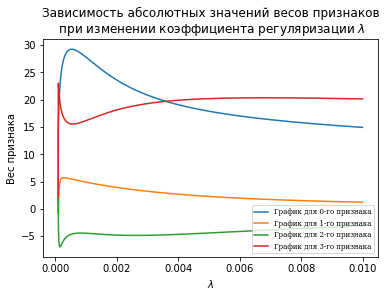

In [314]:
iterations=5000 
eta=1e-2 
lambda_list = np.logspace(-4, -2 , iterations)

W = np.random.randn(X_st.shape[1])
n = X_st.shape[0]
W_list = np.zeros((iterations, X_st.shape[1]))

for i in range(0, iterations):
    y_pred = np.dot(X_st, W)
    err = calc_mse(y, y_pred)
        
    dQ = 2/n * X_st.T @ (y_pred - y) # градиент функции ошибки
    dReg = lambda_list[i] * W # градиент регуляризации
        
    W -= eta * dQ + dReg
    W_list[i, :] = W

legend_font = {
    "size": 7,
    "family": "serif",
}
for i in range(X_st.shape[1]):
    plt.plot(lambda_list, W_list[:, i], label=f'График для {i}-го признака')
    plt.legend(loc="lower right", prop=legend_font)
    
    
plt.title('Зависимость абсолютных значений весов признаков\n при изменении коэффициента регуляризации $\lambda$')
# plt.xticks(np.arange(0, 101, 200))
plt.xlabel('$\lambda$')
plt.ylabel('Вес признака');    

Вывод:.......

2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

#### Решение
Поскольку производная от $\lambda |w|$ равна $\lambda \frac{w}{|w|}$, то

In [186]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки

        #ИЗМЕНЕНИЕ         
        dReg = reg * W/np.abs(W) # градиент регуляризации
        #

        W -= eta * dQ + dReg
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [188]:
W = gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-2, reg=1e-4)

Iter: 0, weights: [1.62059309 0.38792204 0.06408725 2.87204938], error 3115.9337282828837
Iter: 500, weights: [23.0233927   5.20511368 -7.12262911 19.34242134], error 40.25525497619518
Iter: 1000, weights: [27.88411487  6.07651334 -6.00684232 16.59067047], error 33.44190711553749
Iter: 1500, weights: [31.40212983  6.19006277 -4.67604173 14.58218256], error 29.771998460261813
Iter: 2000, weights: [34.04305747  6.21870813 -3.61976539 13.07259083], error 27.681606657946098
Iter: 2500, weights: [36.03593267  6.23435277 -2.8166449  11.93324028], error 26.489200932234297
Iter: 3000, weights: [37.54087355  6.2455402  -2.20952575 11.07282716], error 25.808942120243604
Iter: 3500, weights: [38.67746043  6.25392361 -1.75094045 10.42300928], error 25.420833047161473
Iter: 4000, weights: [39.53586483  6.26024826 -1.40458807  9.93223572], error 25.199387614625728
Iter: 4500, weights: [40.18417386  6.26502423 -1.14300507  9.56157948], error 25.073023801184085
Final MSE: 25.000907157128786


3. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

#### Решение
##### Попробовал применить стандартизацию к нормализованному признаку - получил те же нормализованные значения признака.

4. *Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

Проект: 
1. https://www.kaggle.com/c/regression-tutors-expected-math-exam-results регрессия
1. https://www.kaggle.com/c/classification-choose-tutors классификация

## Литература

1. [Стохастический градиентный спуск](http://www.machinelearning.ru/wiki/index.php?title=%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA)
2. [sklearn.datasets.make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html)
3. [numpy.mean](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.mean.html)
4. [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
5. [sklearn.preprocessing.PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
6. [sklearn.pipeline.make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)

## Summary

_Масштабирование_
* Масштабирование признаков - хорошая практика, позволяющая обучать модели быстрее и делающая их более точными
* При использовании метрических алгоритмов масштабирование обязательно (!)

_Стохастический градиентный спуск_
* Стохастический градиентный спуск (SGD) - на каждом шаге уменьшаем ошибку только на одном объекте (или нескольких), а не на всей выборке, работает быстрее обычного GD, т.к. меньше вычислений
* SGD из-за стохастичности может "перепрыгнуть" локальный минимум и попасть в глобальный

_Регуляризация_
* Переобучение - модель "выучила" выборку, но обобщающая способность слабая
* Признаки переобучения: качество на трейне высокое, а на тесте низкое, большие веса модели
* Один из способов борьбы с переобучением - регуляризация - штраф за большие веса

### Опеределения
*Масштабирование данных*

**Нормализация данных** — метод предобработки числовых признаков в обучающих наборах данных с целью приведения их к некоторой общей шкале без потери информации о различии диапазонов. (шкала от 0 до 1)

**Стандартизация** — метод предобработки с целью приведения данных к единому формату и представлению. (М=0, std=1)
___________
_Стохастический градиентный спуск_

**Стохастический градиентный спуск** — метод нахождения локального экстремума функции (минимума или максимума) с помощью движения вдоль градиента, который считается на каждом шаге не как сумма градиентов от каждого элемента выборки, а как градиент от одного, случайно выбранного элемента.

___________
_Переобучение_

**Переобучение** (overfitting) — явление, когда алгоритм хорошо объясняет примеры из обучающей выборки (обеспечивает малую величину ошибки), но плохо работает на примерах, не участвовавших в обучении (не обеспечивает малую величину ошибки).

**Недообучение** (underfitting) — явление, при котором алгоритм обучения не обеспечивает достаточно малой величины средней ошибки на обучающей выборке.

**Кросс-валидация** — процедура оценивания обобщающей способности алгоритмов. С её помощью эмулируется наличие тестовой выборки, которая не участвует в обучении, но для которой известны правильные ответы.

________
_Регуляризация_

**Регуляризация** — метод добавления некоторых дополнительных ограничений к условию с целью решить некорректно поставленную задачу или предотвратить переобучение. Эта информация часто имеет вид штрафа за сложность модели.
$$Q(w, X) + \lambda ||w||^{2} \rightarrow \underset{w}{\text{min}}.$$

**L1-регуляризация** (lasso, регуляризация через манхэттенское расстояние) — метод добавления дополнительных ограничений в виде $L_{1}$-норму вектора весов, то есть сумму модулей весов. 
$$||w||_{1} = \sum^{d}_{j=1}|w_{j}|.$$

**L2-регуляризация** (ridge, регуляризация Тихонова) — метод добавления дополнительных ограничений в виде $L_{2}$-норму вектора весов, то есть сумму квадратов весов. 
$$||w||_{2} = \sum^{d}_{j=1}w^{2}.$$

